# **Econometria Aplicada**

## Aula 5 - Modelos com dados em painel
---



**Motivação**:

Em análises setoriais ou de avaliação de empresas, muitas vezes os analistas são confrontados com a tarefa de estimar funções de custo para a(s) em questão. Quando a base de dados possui informações de empresas em diferentes momentos do tempo, pode se fazer importante considerar características não-observáveis nessas estimativas. Trabalhemos com o caso das companhias áreas norte-americanas utilizado em Greene (2003). Como podemos estimar uma função de custos a partir da base de dados para seis empresas aéreas dos EUA?

Nas atividades nós vamos utilizar o pacote `AER` para o download da base de dados intitulada `USAirlines`. A base contém 90 observações referentes à 6 companhias aéreas e possui dados anuais (1970-1984) sobre a produção, os custos totais, a capacidade utilizada e o preço do combustível para cada uma das firmas.

### **Pacotes**

In [2]:
install.packages("AER")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘car’, ‘lmtest’, ‘sandwich’, ‘zoo’, ‘Formula’




In [3]:
install.packages("broom")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(AER)
library(ggplot2)
library(broom)

Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival



### **Dados**

In [5]:
data("USAirlines", package = "AER")

In [6]:
head(USAirlines, 30)

,firm,year,output,cost,price,load
,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>
1,1,1970,0.952757,1140640,106650,0.534487
2,1,1971,0.986757,1215690,110307,0.532328
3,1,1972,1.091980,1309570,110574,0.547736
4,1,1973,1.175780,1511530,121974,0.540846
5,1,1974,1.160170,1676730,196606,0.591167
6,1,1975,1.173760,1823740,265609,0.575417
7,1,1976,1.290510,2022890,263451,0.594495
8,1,1977,1.390670,2314760,316411,0.597409
9,1,1978,1.612730,2639160,384110,0.638522


In [7]:
str(USAirlines)

'data.frame':	90 obs. of  6 variables:
 $ firm  : Factor w/ 6 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
  ..- attr(*, "contrasts")= num [1:6, 1:5] 1 0 0 0 0 0 0 1 0 0 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:6] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:5] "1" "2" "3" "4" ...
 $ year  : Factor w/ 15 levels "1970","1971",..: 1 2 3 4 5 6 7 8 9 10 ...
  ..- attr(*, "contrasts")= num [1:15, 1:14] 1 0 0 0 0 0 0 0 0 0 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:15] "1970" "1971" "1972" "1973" ...
  .. .. ..$ : chr [1:14] "1" "2" "3" "4" ...
 $ output: num  0.953 0.987 1.092 1.176 1.16 ...
 $ cost  : int  1140640 1215690 1309570 1511530 1676730 1823740 2022890 2314760 2639160 3247620 ...
 $ price : int  106650 110307 110574 121974 196606 265609 263451 316411 384110 569251 ...
 $ load  : num  0.534 0.532 0.548 0.541 0.591 ...


## **1) Vamos olhar para os dados**

##### a. Faça um gráfico com a dispersão entre os custos totais em milhares de dólares (`cost`) e o índice com a produção das empresas (`output`).

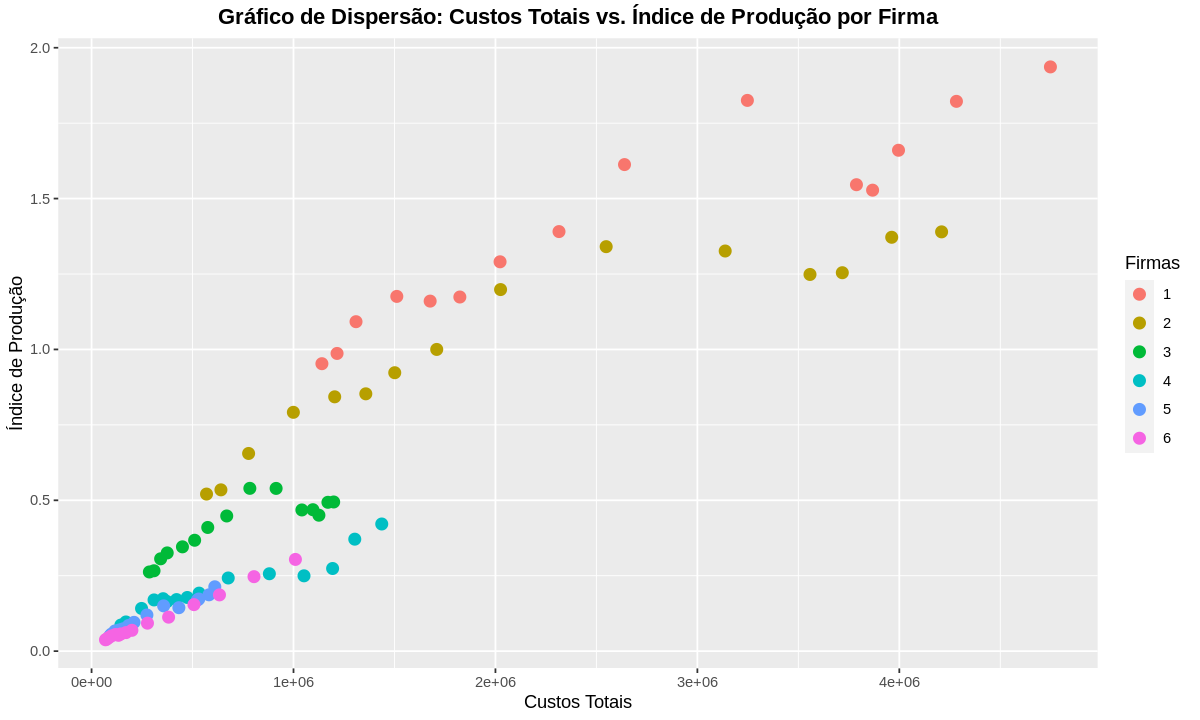

In [8]:
# Definir tamanho personalizado
largura <- 10  # largura do gráfico em polegadas
altura <- 6    # altura do gráfico em polegadas

# Gráfico de dispersão com cores diferentes para cada firma
scatter_plot <- ggplot(USAirlines, aes(x = output, y = cost, color = firm)) +
  geom_point(size = 3) +
  xlab("Índice de Produção") +
  ylab("Custos Totais") +
  ggtitle("Gráfico de Dispersão: Índice de Produção vs. Custos Totais por Firma") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5)) +
  labs(color = "Firmas")  # Adicionar título da legenda

# Ajustar o tamanho do gráfico de dispersão no Google Colab
options(repr.plot.width = largura, repr.plot.height = altura)
scatter_plot

##### b. Faça, em um mesmo gráfico, a relação entre os custos totais em milhares de dólares (`cost`) e o índice com a produção das empresas (`output`), mas considere curvas diferentes para cada uma das empresas. Por que as curvas não começam nos mesmos pontos?

`geom_smooth()` using formula = 'y ~ x'


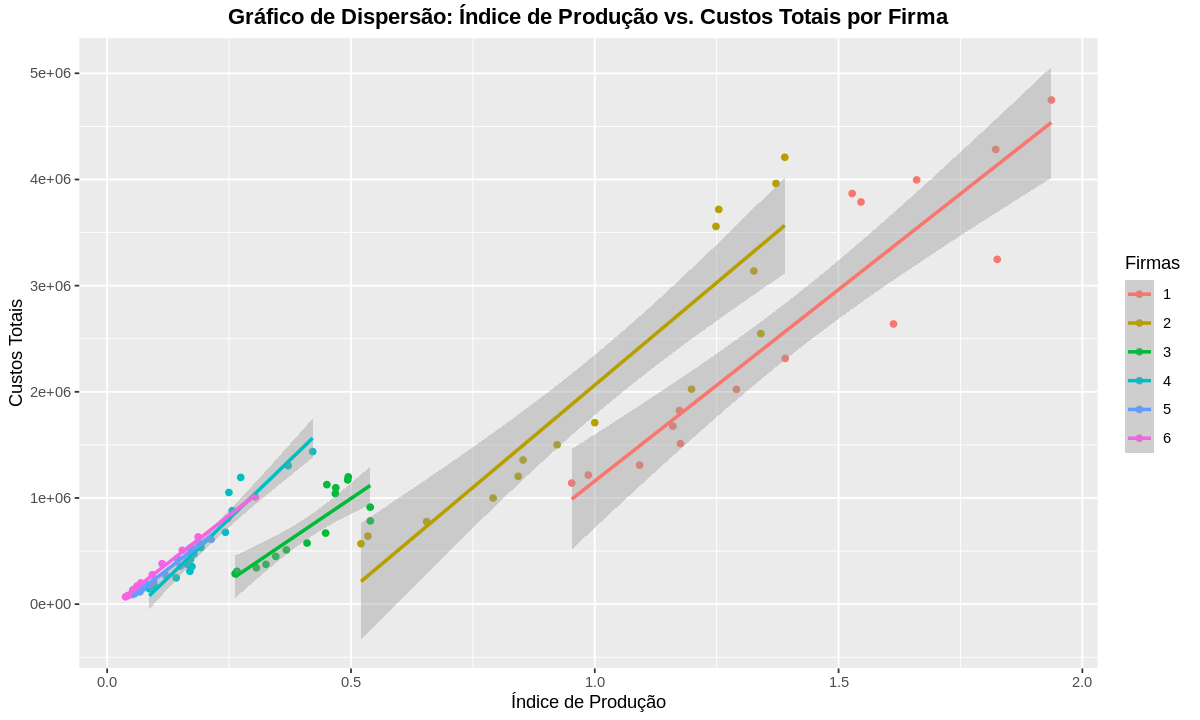

In [33]:
# Criar o gráfico de dispersão com cores diferentes para cada firma e linha de regressão
scatter_plot_with_lines <- ggplot(USAirlines, aes(x = output, y = cost, color = firm)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(title = "Gráfico de Dispersão: Índice de Produção vs. Custos Totais por Firma",
       x = "Índice de Produção",
       y = "Custos Totais") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5),
        legend.position = "right")  +
  labs(color = "Firmas")  # Adicionar título da legenda

# Ajustar o tamanho do gráfico de dispersão no Google Colab
options(repr.plot.width = largura, repr.plot.height = altura)
scatter_plot_with_lines

##### c. Faça um gráfico com a dispersão entre os custos totais em milhares de dólares (`cost`) e o preço do combustível (`price`).

`geom_smooth()` using formula = 'y ~ x'


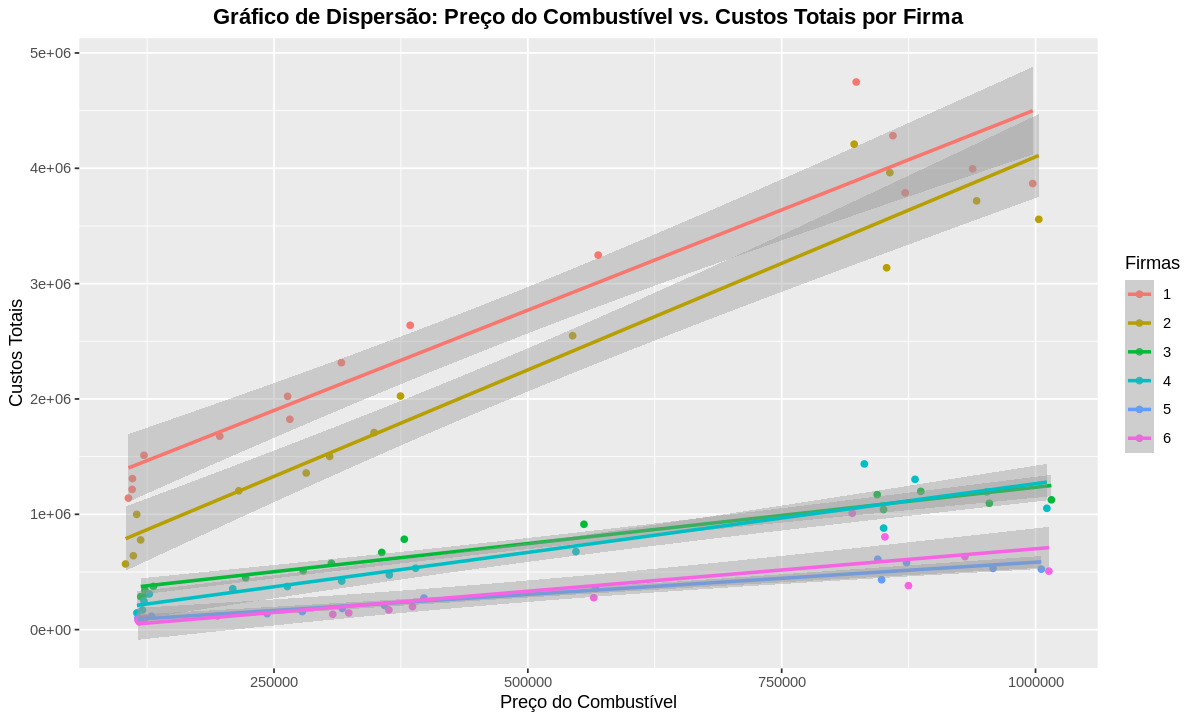

In [31]:
# Criar o gráfico de dispersão com cores diferentes para cada firma e linha de regressão
scatter_plot_with_lines <- ggplot(USAirlines, aes(x = price, y = cost, color = firm)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(title = "Gráfico de Dispersão: Preço do Combustível vs. Custos Totais por Firma",
       x = "Preço do Combustível",
       y = "Custos Totais") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5),
        legend.position = "right")  +
  labs(color = "Firmas")  # Adicionar título da legenda

# Ajustar o tamanho do gráfico de dispersão no Google Colab
options(repr.plot.width = largura, repr.plot.height = altura)
scatter_plot_with_lines

## **2) Descreva os gráficos**

##### Com base nos gráficos dos itens anteriores, descreva os padrões observados.

- ABC

## **3) A estimativa**

Lembre-se do objetivo: estimar uma função de custos para as empresas do setor aéreo nos EUA. Nas suas estimativas, encontre as elasticidades dos custos em relação ao total produzido, ao preço dos combustíveis e a semi-elasticidade em relação à capacidade utilizada (`load`).

Qual é a conclusão?

- ABC

## **4) Aplicação**

Quais os custos totais esperados de uma empresa que produza **`1,2`**, cujos preços dos combustíveis estejam em **`121.000`** e que utilize **`65%`** da sua capacidade?